<a href="https://colab.research.google.com/github/gorky93/classification_rainfallprediction/blob/main/rainfall_prediction_using_logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The goal here is to take this Rain in Australia dataset from  kaggle and use a classfication technique to predict whether it will rain tomorrow
dataset : https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package/data

In [1]:
!pip install kaggle

from google.colab import files
files.upload() # Upload your kaggle.json file

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Download the dataset
!kaggle datasets download -d jsphyg/weather-dataset-rattle-package

# Unzip the dataset
!unzip weather-dataset-rattle-package.zip

Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package
License(s): other
  0% 0.00/3.83M [00:00<?, ?B/s]
100% 3.83M/3.83M [00:00<00:00, 487MB/s]
Archive:  weather-dataset-rattle-package.zip
  inflating: weatherAUS.csv          


In [2]:
!ls

kaggle.json  sample_data  weatherAUS.csv  weather-dataset-rattle-package.zip


In [3]:
import pandas as pd
df = pd.read_csv('weatherAUS.csv')

In [4]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


The goal of the analysis is to predict the Rain Tomorrow column

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [6]:
# percentage of missing values for each column
missing_percentage =(df.isnull().sum() / len(df)) * 100

print("Percentage of missing values per column:")
missing_percentage

Percentage of missing values per column:


,0
Date,0.000000
Location,0.000000
MinTemp,1.020899
MaxTemp,0.866905
Rainfall,2.241853
Evaporation,43.166506
Sunshine,48.009762
WindGustDir,7.098859
WindGustSpeed,7.055548
WindDir9am,7.263853


This shows that Cloud3am Cloud 9am Evaporation and Sunshine have huge amounts of missing data and may not be useefull for modelling our target. Also the target variable RainTomorrow also has missing values which may be needed to discarded. Because our model cannot learn from these data points

In [7]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


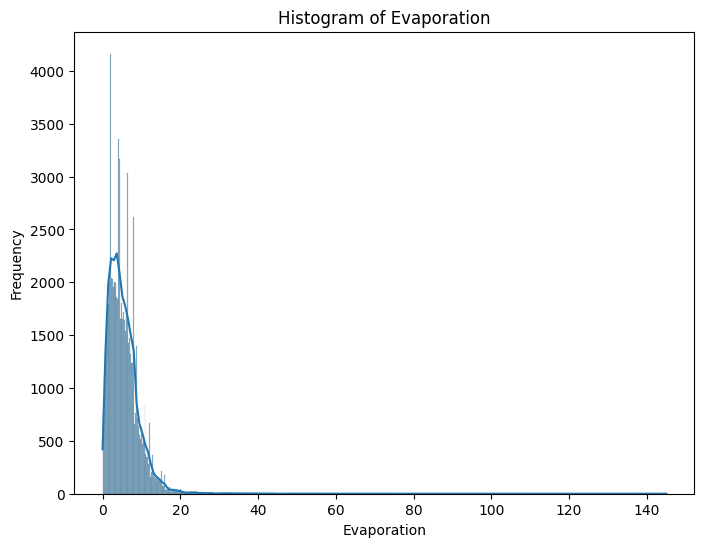

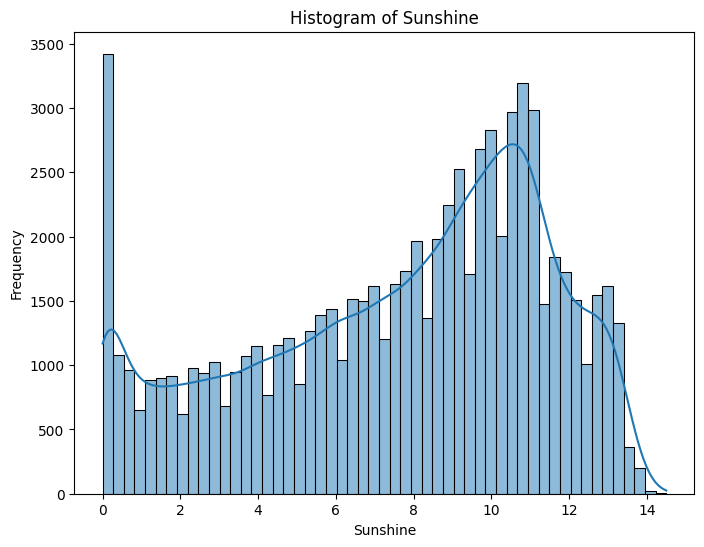

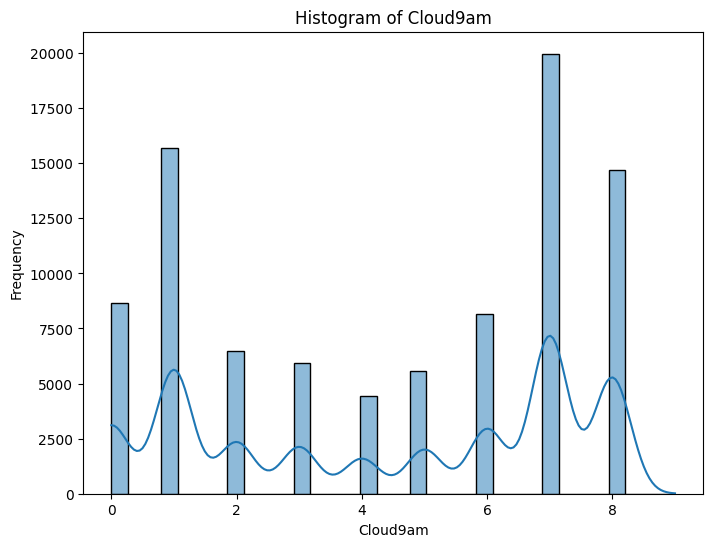

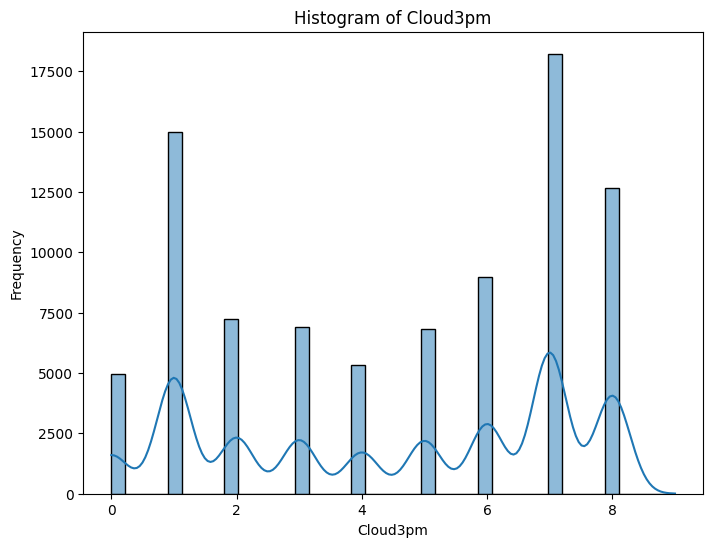

In [8]:
#exploring the distribution of coumns with a high percentage of missing data

import matplotlib.pyplot as plt
import seaborn as sns

columns_to_plot = ['Evaporation', 'Sunshine', 'Cloud9am', 'Cloud3pm']


for col in columns_to_plot:
  plt.figure(figsize=(8, 6))
  sns.histplot(df[col].dropna(), kde=True)
  plt.title(f'Histogram of {col}')
  plt.xlabel(col)
  plt.ylabel('Frequency')
  plt.show()

THis is a point to note.

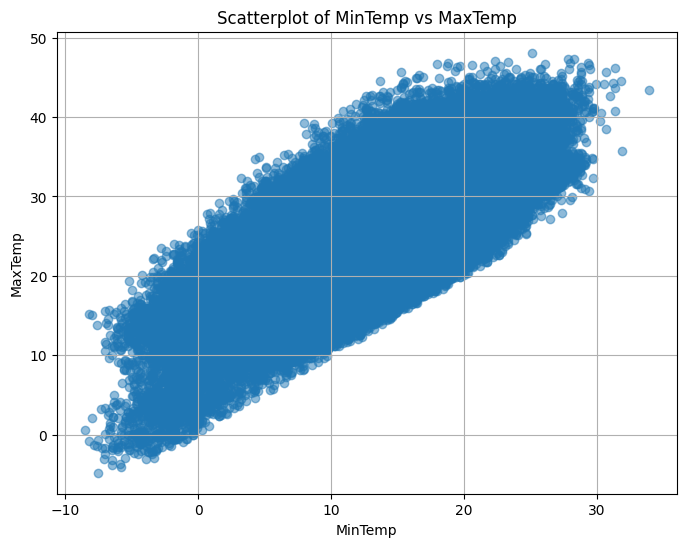

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(df['MinTemp'], df['MaxTemp'], alpha=0.5)
plt.title('Scatterplot of MinTemp vs MaxTemp')
plt.xlabel('MinTemp')
plt.ylabel('MaxTemp')
plt.grid(True)
plt.show()

Predictably higher min temperature is associated with higher max temperatures

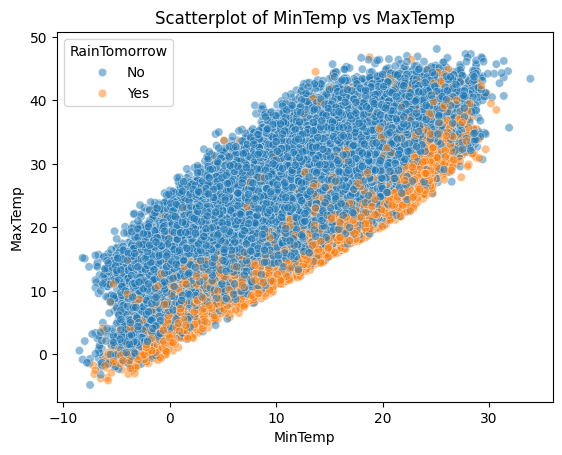

In [10]:
#using seaborn and color coding by target variable

import seaborn as sns

sns.scatterplot(x='MinTemp', y='MaxTemp', data=df, alpha=0.5, hue ='RainTomorrow')
plt.title('Scatterplot of MinTemp vs MaxTemp')
plt.show()

Now we have an interesting insight. The days where max temp remained lower for the same min temp, there was a higher chance of rain tomorrow

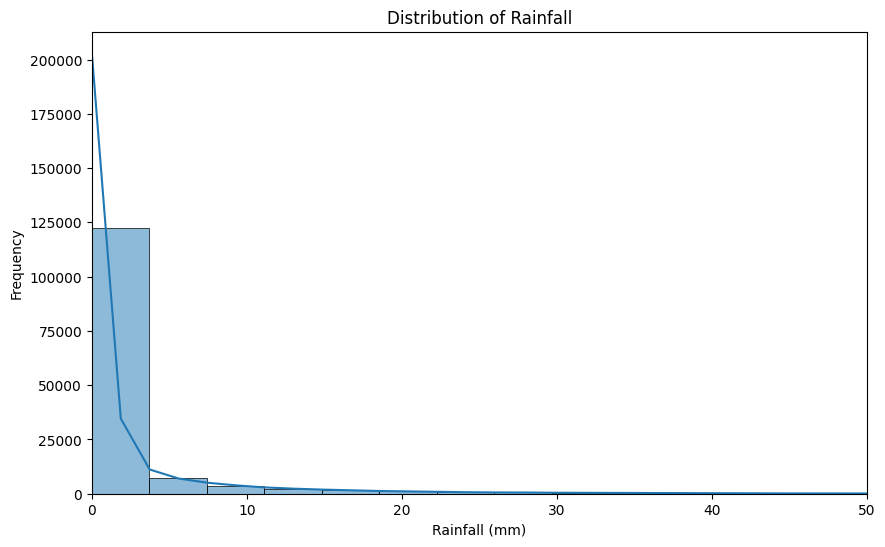

In [11]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Rainfall'], bins=100, kde=True)
plt.title('Distribution of Rainfall')
plt.xlabel('Rainfall (mm)')
plt.ylabel('Frequency')
plt.xlim(0, 50)  # Optional: Zoom in to focus on common values
plt.show()

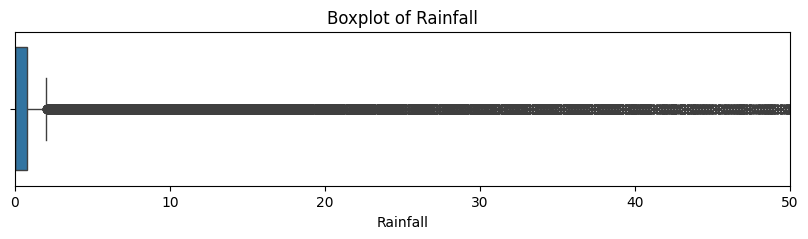

In [12]:
plt.figure(figsize=(10, 2))
sns.boxplot(x=df['Rainfall'])
plt.title('Boxplot of Rainfall')
plt.xlim(0, 50)
plt.show()

In [13]:
df['Rainfall'].describe()

,Rainfall
count,142199.000000
mean,2.360918
std,8.478060
min,0.000000
25%,0.000000
50%,0.000000
75%,0.800000
max,371.000000


In [14]:
(df['Rainfall'] == 0).mean()

np.float64(0.6261515193180256)

In [15]:
# Define bin edges (in mm) and labels
bins = [ -0.1, 0.0, 2.5, 7.6, float('inf') ]  # include 0 safely
labels = ['No Rain', 'Light', 'Moderate', 'Heavy']

# Apply binning
df['RainfallCategory'] = pd.cut(df['Rainfall'], bins=bins, labels=labels)

# Check result
print(df[['Rainfall', 'RainfallCategory']].head(10))

   Rainfall RainfallCategory
0       0.6            Light
1       0.0          No Rain
2       0.0          No Rain
3       0.0          No Rain
4       1.0            Light
5       0.2            Light
6       0.0          No Rain
7       0.0          No Rain
8       0.0          No Rain
9       1.4            Light


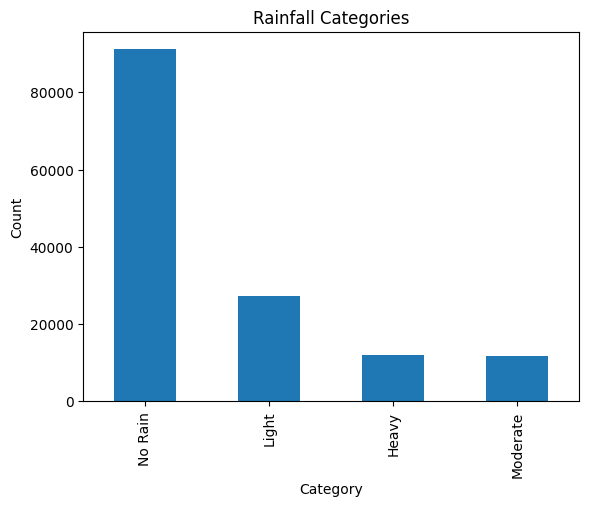

In [16]:
df['RainfallCategory'].value_counts().plot(kind='bar')
plt.title('Rainfall Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

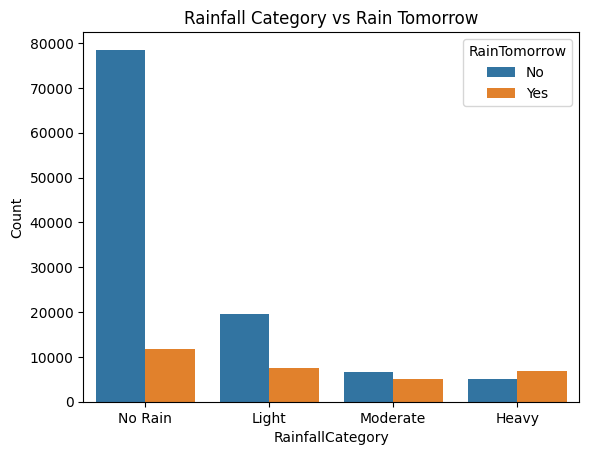

In [17]:
# Grouped bar chart
sns.countplot(data=df, x='RainfallCategory', hue='RainTomorrow')
plt.title('Rainfall Category vs Rain Tomorrow')
plt.ylabel('Count')
plt.show()

It can be seen that heavy and moderate rainfall is highly associated with Rain Tomorrow

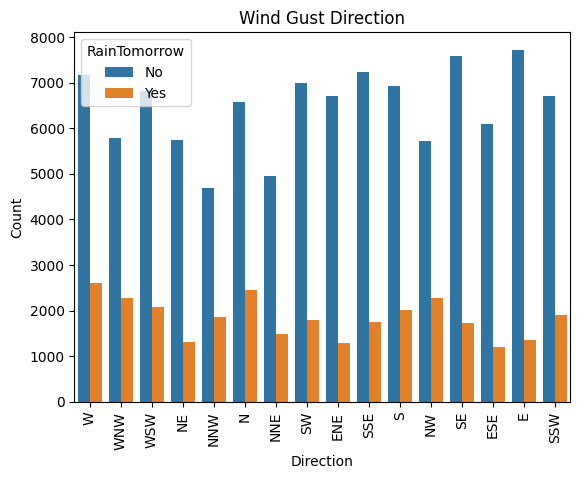

In [21]:
sns.countplot(data=df, x='WindGustDir', hue='RainTomorrow')
plt.title('Wind Gust Direction')
plt.xlabel('Direction')
plt.ylabel('Count')
plt.xticks(rotation=90) # Rotate labels to prevent overlap
plt.show()

There is no stong indication that windgust is associated with rain tomorrow.

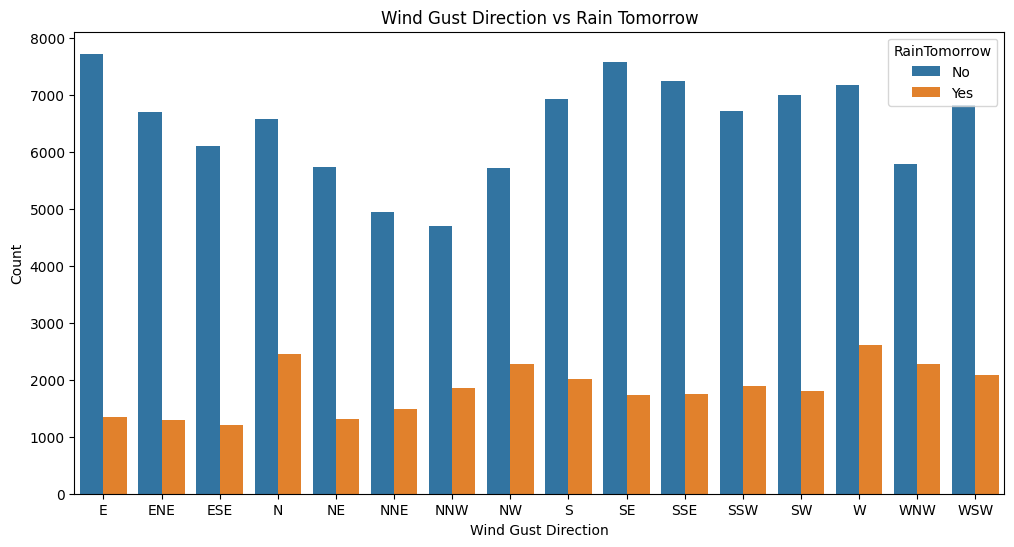

In [22]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='WindGustDir', hue='RainTomorrow', order=sorted(df['WindGustDir'].dropna().unique()))
plt.title('Wind Gust Direction vs Rain Tomorrow')
plt.xlabel('Wind Gust Direction')
plt.ylabel('Count')
plt.show()

In [23]:
pd.crosstab(df['WindGustDir'], df['RainTomorrow'])

RainTomorrow,No,Yes
WindGustDir,,
E,7721,1350
ENE,6704,1288
ESE,6105,1200
N,6581,2452
NE,5741,1319
NNE,4952,1481
NNW,4698,1863
NW,5719,2284
S,6932,2017


In [24]:
pd.crosstab(df['WindGustDir'], df['RainTomorrow'], normalize='index')

RainTomorrow,No,Yes
WindGustDir,,
E,0.851174,0.148826
ENE,0.838839,0.161161
ESE,0.835729,0.164271
N,0.728551,0.271449
NE,0.813173,0.186827
NNE,0.769781,0.230219
NNW,0.716049,0.283951
NW,0.714607,0.285393
S,0.774612,0.225388


In [26]:
df['WindGustSpeed'].describe()

,WindGustSpeed
count,135197.000000
mean,40.035230
std,13.607062
min,6.000000
25%,31.000000
50%,39.000000
75%,48.000000
max,135.000000


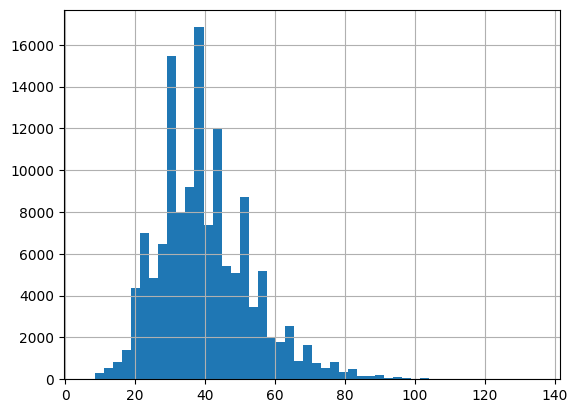

In [27]:
df['WindGustSpeed'].hist(bins=50)
plt.show()

In [30]:
df.groupby('RainTomorrow')['WindGustSpeed'].describe()

,count,mean,std,min,25%,50%,75%,max
RainTomorrow,,,,,,,,
No,103488.0,38.288391,12.406522,6.0,30.0,37.0,44.0,126.0
Yes,29435.0,45.946764,15.717954,7.0,35.0,44.0,56.0,135.0


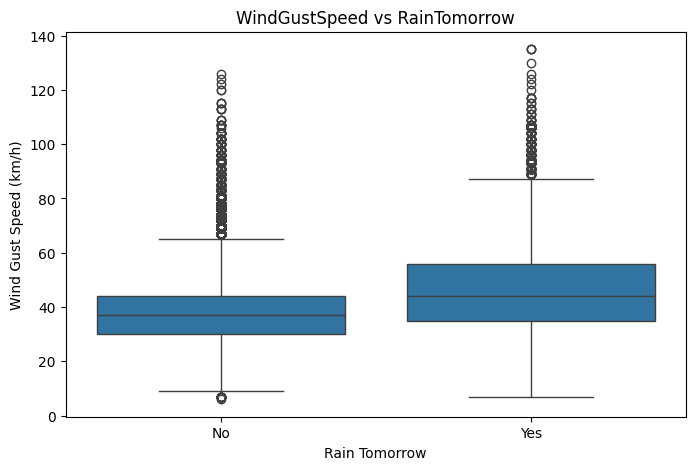

In [32]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='RainTomorrow', y='WindGustSpeed', data=df)
plt.title('WindGustSpeed vs RainTomorrow')
plt.xlabel('Rain Tomorrow')
plt.ylabel('Wind Gust Speed (km/h)')
plt.show()

It appears that the median wind gust speed is slightly higher on days when it rained tomorrow.

In [34]:
df['RainTomorrow'].value_counts(normalize=True)*100

,proportion
RainTomorrow,
No,77.581878
Yes,22.418122


In [35]:
rain_by_location = pd.crosstab(df['Location'], df['RainTomorrow'], normalize='index') * 100
print(rain_by_location.sort_values('Yes', ascending=False))

RainTomorrow             No        Yes
Location                              
Portland          63.451268  36.548732
Walpole           66.335580  33.664420
Cairns            68.206158  31.793842
Dartmoor          68.671424  31.328576
NorfolkIsland     68.994602  31.005398
MountGambier      69.636964  30.363036
Albany            70.092838  29.907162
Witchcliffe       70.223577  29.776423
CoffsHarbour      70.572299  29.427701
MountGinini       71.826625  28.173375
NorahHead         72.413793  27.586207
Williamtown       72.581277  27.418723
Darwin            73.308271  26.691729
Melbourne         73.880903  26.119097
GoldCoast         73.993289  26.006711
Sydney            74.078514  25.921486
Ballarat          74.207398  25.792602
SydneyAirport     74.242928  25.757072
Newcastle         75.262267  24.737733
Watsonia          75.391797  24.608203
Wollongong        76.097888  23.902112
Hobart            76.129235  23.870765
Launceston        76.915456  23.084544
Brisbane          77.5703

In [36]:
df.groupby('Location')[['Humidity9am', 'Humidity3pm', 'Rainfall']].mean().sort_values('Humidity3pm')

,Humidity9am,Humidity3pm,Rainfall
Location,,,
Uluru,42.664107,24.127700,0.784363
AliceSprings,39.690155,24.131466,0.882850
Woomera,53.127503,28.402414,0.490405
Cobar,55.152913,33.870666,1.127309
Mildura,64.103792,35.402329,0.945062
Moree,61.376705,35.808589,1.630203
SalmonGums,62.806408,40.751771,1.034382
PerthAirport,58.775673,41.923205,1.761648
PearceRAAF,60.823352,42.079142,1.669080
